### Wordclouds and Ngrams

In [1]:
# Import packages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords # import other stopword library
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import ngram_graphs

In [2]:
# load data
df = pd.read_csv("But how does bitcoin actually work.csv",delimiter=";")


In [3]:
comments_cleaned = df.Comment
comments_cleaned

0      If you see comments here about investing or br...
1      I'd recommend not just reporting, but also rep...
2                                 Thank you so much Lisa
3      Only a matter of time before scammers come her...
4      Wow I’m already seeing scams scrolling through...
                             ...                        
166    Thank you for your comment on this video, we'l...
167    The software "TeamSpeak" also uses proof of wo...
168    One of the best videos so far I have come acro...
169                                                  📞📲📩
170    Thank you very much. I have been wanting to un...
Name: Comment, Length: 171, dtype: object

In [4]:
text = ''.join(comments_cleaned) 
text = text.lower()

In [5]:
tokens = word_tokenize(text)
tokens

['if',
 'you',
 'see',
 'comments',
 'here',
 'about',
 'investing',
 'or',
 'brokers',
 ',',
 'they',
 'are',
 'scams',
 '.',
 'videos',
 'about',
 'cryptocurrencies',
 ',',
 'evidently',
 'including',
 'ones',
 'that',
 'are',
 'just',
 'about',
 'the',
 'underlying',
 'technology/math',
 ',',
 'are',
 'hotbeds',
 'for',
 'attracting',
 'nefarious',
 'actors',
 'preying',
 'on',
 'the',
 'impressionable.also',
 ',',
 'hi',
 '!',
 'if',
 'you',
 '’',
 're',
 'new',
 'to',
 'this',
 'channel',
 ',',
 'most',
 'of',
 'it',
 'is',
 'about',
 'visualizing',
 'math',
 '.',
 'i',
 'get',
 'it',
 ',',
 'you',
 'probably',
 'landed',
 'here',
 'searching',
 'for',
 'how',
 'btc',
 'works',
 ',',
 'not',
 'to',
 'spend',
 'your',
 'afternoon',
 'getting',
 'pulled',
 'into',
 'learning',
 'about',
 ',',
 'say',
 ',',
 'prime',
 'numbers',
 'or',
 'problem-solving',
 ',',
 'but',
 'if',
 'you',
 'have',
 'a',
 'moment',
 'take',
 'a',
 'look',
 'at',
 'the',
 'rest',
 'of',
 'the',
 'channel',


In [6]:
# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text = re.sub(r'[0-9]+', '', str(text))
print(text)

if you see comments here about investing or brokers, they are scams.  videos about cryptocurrencies, evidently including ones that are just about the underlying technology/math, are hotbeds for attracting nefarious actors preying on the impressionable.also, hi!  if you’re new to this channel, most of it is about visualizing math. i get it, you probably landed here searching for how btc works, not to spend your afternoon getting pulled into learning about, say, prime numbers or problem-solving, but if you have a moment take a look at the rest of the channel, you may enjoy what you find.i'd recommend not just reporting, but also replying to them, explaining to any potential readers how their advertisement is a scam. commenting is quick, and could save somebody hundreds of dollars! :)thank you so much lisaonly a matter of time before scammers come here and give you some discounts.wow i’m already seeing scams scrolling through the replies to this lmao.i appreciate your efforts toward my ac

In [7]:
# Import package
import matplotlib.pyplot as plt# Define a function to plot word cloud

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 15))
    
    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

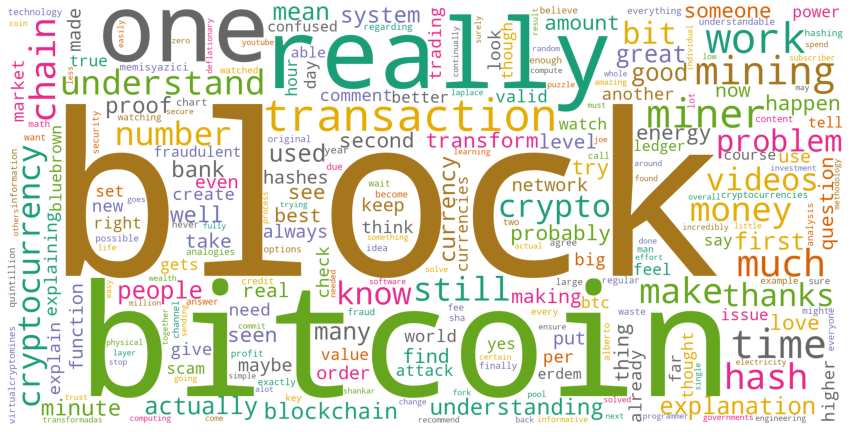

In [8]:
# Generate word cloud (unigram)
STOPWORDS = STOPWORDS.union(['thank', 'way', 'will', 'linuxtechcorps', 'video'])
wordcloud = WordCloud(width=2000, height = 1000, max_words = 250, random_state=123, background_color='white', 
                      colormap='Dark2', collocations=False, stopwords = STOPWORDS, min_word_length=3).generate(text)

# Plot
plot_cloud(wordcloud)

plt.savefig("wc.svg", format="svg")

In [9]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5]) # top five words
print(list(rel_freq.items())[:5]) # top five words

[('block', 44), ('bitcoin', 30), ('really', 27), ('one', 26), ('transaction', 26)]
[('block', 1.0), ('bitcoin', 0.6818181818181818), ('really', 0.6136363636363636), ('one', 0.5909090909090909), ('transaction', 0.5909090909090909)]


In [10]:
# simple bigrams
from nltk import word_tokenize 
from nltk.util import ngrams

for line in [text]:
    token = word_tokenize(line)
    bigram = list(ngrams(token, 2)) 
bigram

[('if', 'you'),
 ('you', 'see'),
 ('see', 'comments'),
 ('comments', 'here'),
 ('here', 'about'),
 ('about', 'investing'),
 ('investing', 'or'),
 ('or', 'brokers'),
 ('brokers', ','),
 (',', 'they'),
 ('they', 'are'),
 ('are', 'scams'),
 ('scams', '.'),
 ('.', 'videos'),
 ('videos', 'about'),
 ('about', 'cryptocurrencies'),
 ('cryptocurrencies', ','),
 (',', 'evidently'),
 ('evidently', 'including'),
 ('including', 'ones'),
 ('ones', 'that'),
 ('that', 'are'),
 ('are', 'just'),
 ('just', 'about'),
 ('about', 'the'),
 ('the', 'underlying'),
 ('underlying', 'technology/math'),
 ('technology/math', ','),
 (',', 'are'),
 ('are', 'hotbeds'),
 ('hotbeds', 'for'),
 ('for', 'attracting'),
 ('attracting', 'nefarious'),
 ('nefarious', 'actors'),
 ('actors', 'preying'),
 ('preying', 'on'),
 ('on', 'the'),
 ('the', 'impressionable.also'),
 ('impressionable.also', ','),
 (',', 'hi'),
 ('hi', '!'),
 ('!', 'if'),
 ('if', 'you'),
 ('you', '’'),
 ('’', 're'),
 ('re', 'new'),
 ('new', 'to'),
 ('to', 'th

In [11]:
# create n-grams
# Unigrams
X = []
cv=CountVectorizer(stop_words='english', ngram_range=(1, 1)) # remove stopwords with the nltk library

# Transform
X = cv.fit_transform([text])
# Create the bow representation
X_df=pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
print(X_df.head())
unigrams = cv.get_feature_names_out()
unigrams

   _not  _owning  ability  able  academy  accept  accepted  access  \
0     1        1        1     5        1       1         3       2   

   accompanying  account  ...  yielding  youit  young  youtube  youtubers  \
0             1        1  ...         1      1      1        3          1   

   zero  zeroes  zeros  zil  𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more  
0     1       1      3    2                2  

[1 rows x 1299 columns]


array(['_not', '_owning', 'ability', ..., 'zeros', 'zil',
       '𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more'], dtype=object)

In [24]:
#create n-grams
# Bigrams
X2 = []
cv2=CountVectorizer(stop_words=stopwords, ngram_range=(2, 2)) # remove stopwords with the nltk library

# Transform
X2 = cv2.fit_transform([text])
# Create the bow representation
X2_df=pd.DataFrame(X2.toarray(), columns=cv2.get_feature_names_out())
print(X2_df.head())
bigrams = cv2.get_feature_names_out()
bigrams

   _not _owning  _owning crypto  ability people  able access  able calculate  \
0             1               1               1            1               1   

   able exploit  able set  able spend  academy provided  accept latest  ...  \
0             1         1           1                 1              1  ...   

   youtubers oversimplifying  youve finished  youve got  zero since  \
0                          1               1          1           1   

   zeroes followed  zeros believe  zeros needed  zeros simple  zil nft  \
0                1              1             1             1        2   

   𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more updates  
0                        2  

[1 rows x 2885 columns]


array(['_not _owning', '_owning crypto', 'ability people', ...,
       'zeros simple', 'zil nft', '𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more updates'], dtype=object)

In [13]:
cv_fit = X2   
word_list = cv2.get_feature_names_out() 
count_list = cv_fit.toarray().sum(axis=0)
bigram_dict = dict(zip(word_list,count_list))
bigram_dict

{'_not _owning': 1,
 '_owning crypto': 1,
 'ability people': 1,
 'able access': 1,
 'able calculate': 1,
 'able exploit': 1,
 'able set': 1,
 'able spend': 1,
 'academy provided': 1,
 'accept latest': 1,
 'accepted bank': 1,
 'accepted one': 1,
 'accepted think': 1,
 'access coins': 1,
 'access private': 1,
 'accompanying sha': 1,
 'account give': 1,
 'acctually tho': 1,
 'accurate cryptocurrencies': 1,
 'achieved starting': 1,
 'across explains': 1,
 'actors preying': 1,
 'actual bitcoins': 1,
 'actual number': 1,
 'actual processes': 1,
 'actually believe': 1,
 'actually dynamical': 1,
 'actually earn': 1,
 'actually explaining': 2,
 'actually feel': 1,
 'actually generates': 1,
 'actually incentivizes': 1,
 'actually offset': 1,
 'actually used': 1,
 'actually valid': 1,
 'adapt ones': 1,
 'add onto': 1,
 'adding new': 1,
 'adding onto': 1,
 'additional mechanism': 1,
 'additional possibilities': 1,
 'adjust make': 1,
 'adopted yet': 1,
 'advancements technology': 1,
 'advertisement

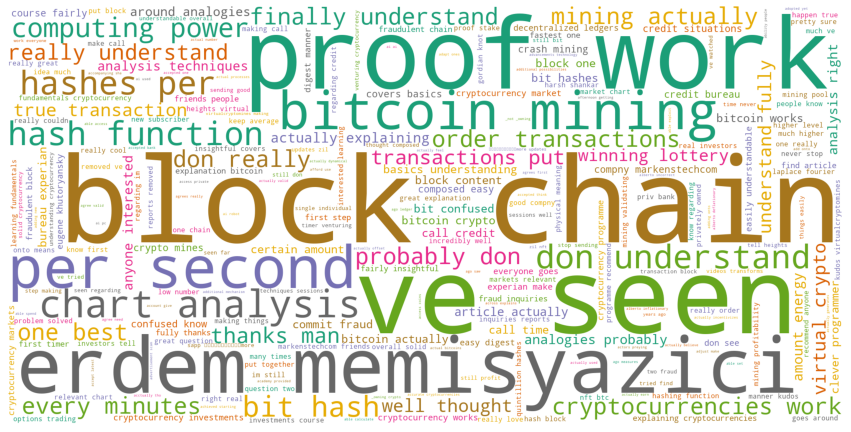

In [14]:
from collections import Counter
STOPWORDS = STOPWORDS.union(['thank', 'way', 'will', 'linuxtechcorps', 'video', 'youtube', 'ive'])
word_cloud_dict = bigram_dict
wordcloud = WordCloud(width = 2000, height = 1000, colormap='Dark2', stopwords=STOPWORDS, max_words = 250, random_state=123, background_color='white').generate_from_frequencies(word_cloud_dict)

#def plot_cloud(wordcloud):
#    plt.figure(figsize=(10, 10))
#    plt.imshow(wordcloud)
#    plt.axis("off");
#bigram_wordcloud = 
#bigram_wordcloud
plot_cloud(wordcloud)
plt.savefig("wc2.svg", format="svg")
# the frequencies show just how much spam there actually is in the comments#

In [15]:
#create n-grams
#Trigrams
X3 = []
cv3=CountVectorizer(stop_words=stopwords, ngram_range=(3, 3)) # remove stopwords with the nltk library

# Transform
X3 = cv3.fit_transform([text])
# Create the bow representation
X3_df=pd.DataFrame(X3.toarray(), columns=cv3.get_feature_names_out ())
print(X3_df.head())
Trigrams = cv3.get_feature_names_out ()
Trigrams

   _not _owning crypto  _owning crypto far  ability people personal  \
0                    1                   1                        1   

   able access coins  able calculate hash  able exploit system  able set hash  \
0                  1                    1                    1              1   

   able spend money  academy provided support  accept latest block  ...  \
0                 1                         1                    1  ...   

   youtube video really  youtube worse joe  youtubers oversimplifying things  \
0                     1                  1                                 1   

   zero since value  zeroes followed random  zeros believe arbitrary  \
0                 1                       1                        1   

   zeros needed changed  zeros simple pattern  zil nft btc  \
0                     1                     1            2   

   𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more updates zil  
0                            2  

[1 rows x 2954 columns]


array(['_not _owning crypto', '_owning crypto far',
       'ability people personal', ..., 'zeros simple pattern',
       'zil nft btc', '𝟭𝟰𝟭𝟯𝟯𝟱𝟰𝟰𝟵𝟰𝟴more updates zil'], dtype=object)

In [16]:
#from collections import Counter
#word_could_dict=Counter(Trigrams)
#wordcloud = WordCloud(width = 1000, height = 500, colormap='Dark2', stopwords=new_stopwords, random_state=123, background_color='white').generate_from_frequencies(word_could_dict)
#def plot_cloud(wordcloud):
#    plt.figure(figsize=(10, 10))
#    plt.imshow(wordcloud)
#    plt.axis("off");
#plot_cloud(wordcloud)

In [17]:
#nltk.download('omw-1.4') #in case you get an error
# more sophisticated dictionary method
WNL = nltk.WordNetLemmatizer()
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list 
stopwords_wc = set(stopwords)
customised_words = ['thank', 'would', 'this🌟🌟🌟', 'virtualcryptomines🟡com', 
                    'coins📲📩📩📩📩this', 'this📲📩📩📩👆👆👆fourth', 'glad', '😁✌️📲📩📩i', 
                    'net','virtualcryptomines🪐com','sincerely','utmost' 'linuxtechcorps🟡org', 'linuxtechcorps🎡org', 'linuxtechcorps','testimony']
new_stopwords = stopwords_wc.union(customised_words)
text_content = [word for word in text_content if word not in new_stopwords]

# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))

print(bigrams_list, 5)
dictionary2 = [' '.join(tup) for tup in bigrams_list if tup not in new_stopwords]
print(dictionary2,5)


[('see', 'comment'), ('comment', 'investing'), ('investing', 'broker'), ('broker', 'scam'), ('scam', 'video'), ('video', 'cryptocurrencies'), ('cryptocurrencies', 'evidently'), ('evidently', 'including'), ('including', 'one'), ('one', 'underlying'), ('underlying', 'technology/math'), ('technology/math', 'hotbed'), ('hotbed', 'attracting'), ('attracting', 'nefarious'), ('nefarious', 'actor'), ('actor', 'preying'), ('preying', 'impressionablealso'), ('impressionablealso', 'hi'), ('hi', 'new'), ('new', 'channel'), ('channel', 'visualizing'), ('visualizing', 'math'), ('math', 'get'), ('get', 'probably'), ('probably', 'landed'), ('landed', 'searching'), ('searching', 'btc'), ('btc', 'work'), ('work', 'spend'), ('spend', 'afternoon'), ('afternoon', 'getting'), ('getting', 'pulled'), ('pulled', 'learning'), ('learning', 'say'), ('say', 'prime'), ('prime', 'number'), ('number', 'problemsolving'), ('problemsolving', 'moment'), ('moment', 'take'), ('take', 'look'), ('look', 'rest'), ('rest', 'ch

In [18]:
dictionary2

['see comment',
 'comment investing',
 'investing broker',
 'broker scam',
 'scam video',
 'video cryptocurrencies',
 'cryptocurrencies evidently',
 'evidently including',
 'including one',
 'one underlying',
 'underlying technology/math',
 'technology/math hotbed',
 'hotbed attracting',
 'attracting nefarious',
 'nefarious actor',
 'actor preying',
 'preying impressionablealso',
 'impressionablealso hi',
 'hi new',
 'new channel',
 'channel visualizing',
 'visualizing math',
 'math get',
 'get probably',
 'probably landed',
 'landed searching',
 'searching btc',
 'btc work',
 'work spend',
 'spend afternoon',
 'afternoon getting',
 'getting pulled',
 'pulled learning',
 'learning say',
 'say prime',
 'prime number',
 'number problemsolving',
 'problemsolving moment',
 'moment take',
 'take look',
 'look rest',
 'rest channel',
 'channel may',
 'may enjoy',
 'enjoy findid',
 'findid recommend',
 'recommend reporting',
 'reporting also',
 'also replying',
 'replying explaining',
 'expla

In [26]:
#Using count vectoriser to view the frequency of bigrams
# remove spam comments with max_df
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=new_stopwords, max_df=7)
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print (words_freq[:100])

[('great video', 7), ('ive seen', 5), ('bit hash', 5), ('hash per', 5), ('per second', 5), ('dont understand', 4), ('proof work', 4), ('hash function', 4), ('bitcoin mining', 4), ('cryptocurrency market', 4), ('video transforms', 3), ('well thought', 3), ('computing power', 3), ('mining actually', 3), ('cryptocurrencies work', 3), ('probably dont', 3), ('understand fully', 3), ('every minute', 3), ('ever seen', 3), ('im still', 3), ('many time', 3), ('really understand', 3), ('dont really', 3), ('first step', 3), ('order transaction', 3), ('transaction put', 3), ('put block', 3), ('winning lottery', 3), ('erdem memisyazici', 3), ('true transaction', 3), ('virtual crypto', 3), ('technology math', 2), ('marketinvestmentbinary com', 2), ('really cool', 2), ('laplace fourier', 2), ('physical meaning', 2), ('understandable way', 2), ('seen far', 2), ('one best', 2), ('incredibly well', 2), ('commit fraud', 2), ('certain amount', 2), ('used generated', 2), ('mining pool', 2), ('verify hash',

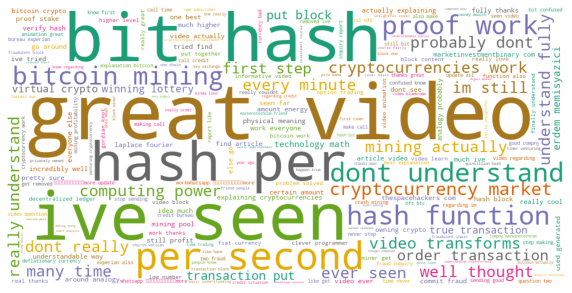

In [20]:
#Generating wordcloud (bigrams)
words_dict = dict(words_freq)
WC_height = 500
WC_width = 1000
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, colormap='Dark2', height=WC_height, width=WC_width,stopwords=new_stopwords, random_state=123, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
plot_cloud(wordCloud)

In [21]:
trigrams_list = list(nltk.trigrams(text_content))
dictionary3 = [' '.join(tup) for tup in trigrams_list if tup not in new_stopwords]
print(dictionary3)

['see comment investing', 'comment investing broker', 'investing broker scam', 'broker scam video', 'scam video cryptocurrencies', 'video cryptocurrencies evidently', 'cryptocurrencies evidently including', 'evidently including one', 'including one underlying', 'one underlying technology/math', 'underlying technology/math hotbed', 'technology/math hotbed attracting', 'hotbed attracting nefarious', 'attracting nefarious actor', 'nefarious actor preying', 'actor preying impressionablealso', 'preying impressionablealso hi', 'impressionablealso hi new', 'hi new channel', 'new channel visualizing', 'channel visualizing math', 'visualizing math get', 'math get probably', 'get probably landed', 'probably landed searching', 'landed searching btc', 'searching btc work', 'btc work spend', 'work spend afternoon', 'spend afternoon getting', 'afternoon getting pulled', 'getting pulled learning', 'pulled learning say', 'learning say prime', 'say prime number', 'prime number problemsolving', 'number 

In [22]:
#Using count vectoriser to view the frequency of trigrams
vectorizer3 = CountVectorizer(ngram_range=(3, 3), stop_words=new_stopwords)# remove spam comments with max_df
bag_of_words3 = vectorizer3.fit_transform(dictionary3)
vectorizer3.vocabulary_
sum_words3 = bag_of_words3.sum(axis=0) 
words_freq3 = [(word, sum_words3[0, idx]) for word, idx in vectorizer3.vocabulary_.items()]
words_freq3 = sorted(words_freq3, key = lambda x: x[1], reverse=True)
print (words_freq3[:100])

[('hash per second', 5), ('probably dont understand', 3), ('dont understand fully', 3), ('hours days weeks', 3), ('underlying technology math', 2), ('technology math hotbed', 2), ('least marketinvestmentbinary com', 2), ('marketinvestmentbinary com yeah', 2), ('ive seen far', 2), ('bit used generated', 2), ('used generated password', 2), ('time verify hash', 2), ('verify hash block', 2), ('idea much ive', 2), ('much ive tried', 2), ('ive tried find', 2), ('tried find article', 2), ('find article video', 2), ('article video actually', 2), ('video actually explaining', 2), ('actually explaining cryptocurrencies', 2), ('explaining cryptocurrencies work', 2), ('cryptocurrencies work everyone', 2), ('work everyone else', 2), ('everyone else go', 2), ('else go around', 2), ('go around analogy', 2), ('around analogy probably', 2), ('analogy probably dont', 2), ('understand fully thanks', 2), ('expert thespacehackers com', 2), ('thespacehackers com ive', 2), ('awesome video animation', 2), ('v

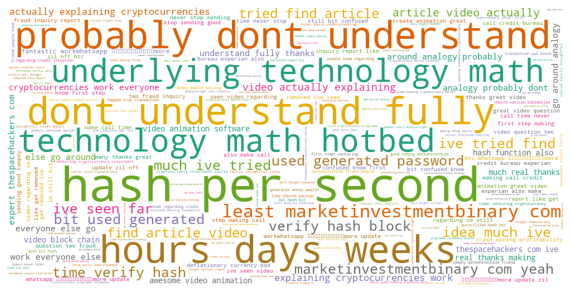

In [23]:
#Generating wordcloud (Trigram)
words_dict = dict(words_freq3)
WC_height = 500
WC_width = 1000
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, colormap='Dark2', height=WC_height, width=WC_width,stopwords=new_stopwords, random_state=123, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
plot_cloud(wordCloud)

#### Arranging for frequency basically gets you a lot of bot messages at the top of the hierarchy.

### The sentiment analysis continues in part 3...